In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import umap.umap_ as umap

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
from IPython.core.pylabtools import figsize
SIZE_X = 14
SIZE_Y = 7
figsize(SIZE_X, SIZE_Y)
sns.set_theme()

In [3]:
df = pd.read_csv('nba2k20-full.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [4]:
df.team.fillna("none", inplace=True)
df.college.fillna("none", inplace=True)

In [5]:
def get_weight(series: pd.Series) -> pd.Series:
    return series.str.extract(r'(\d+) lbs\. / (\d+(\.\d+|)) kg\.')[1].apply(
        float)


def get_height(series: pd.Series) -> pd.Series:
    return series.str.extract(r'((\d+)-(\d+)) / (\d+(\.\d+|))')[3].apply(float)


df = df.assign(weight_kg=df.weight.pipe(get_weight)) \
        .assign(height_m=df.height.pipe(get_height))
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,weight_kg,height_m
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,none,113.4,2.06
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,102.1,2.01
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,none,109.8,2.11
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,104.3,2.08
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,99.8,1.96


In [6]:
df.salary = df.salary.str.slice(1).apply(int)
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,weight_kg,height_m
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858,USA,2003,1,1,none,113.4,2.06
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000,USA,2011,1,15,San Diego State,102.1,2.01
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697,Greece,2013,1,15,none,109.8,2.11
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000,USA,2007,1,2,Texas,104.3,2.08
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000,USA,2009,1,3,Arizona State,99.8,1.96


In [7]:
# normalize stuff for TSNE
df.rating /= 100
df.salary /= 4e8
df.weight_kg /= 100
df.height_m /= 2

In [8]:
X_parameters = ["rating", "weight_kg", "height_m", "salary"]
y_parameter = "position"
X = df[X_parameters]
y = df[y_parameter]

<AxesSubplot:>

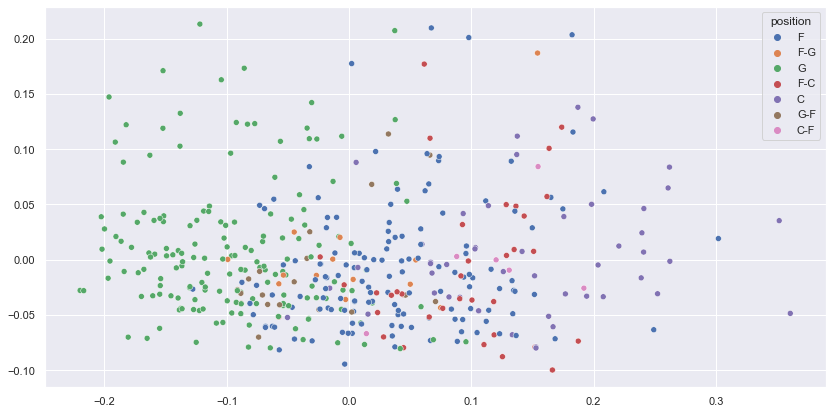

In [9]:
pca = PCA(n_components=2)
pca.fit(X)
X_PCA_reduced = pca.fit_transform(X)
sns.scatterplot(x=X_PCA_reduced[:, 0], y=X_PCA_reduced[:, 1], hue=y)

<AxesSubplot:>

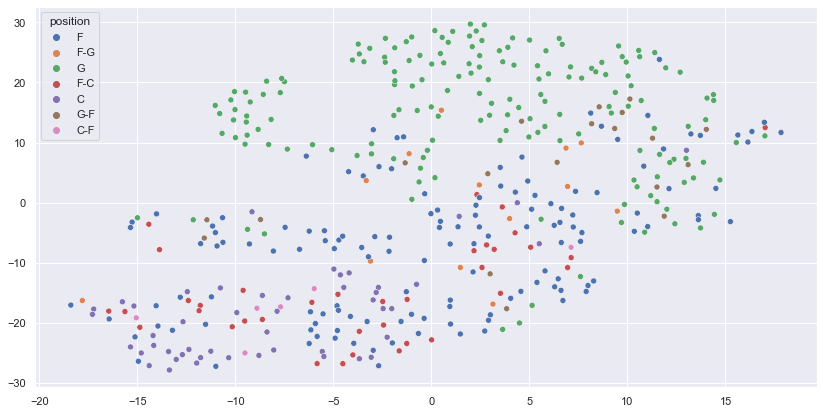

In [10]:
tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', init='random')
X_TSNE_reduced = tsne.fit_transform(X)
sns.scatterplot(x=X_TSNE_reduced[:, 0], y=X_TSNE_reduced[:, 1], hue=y)

<AxesSubplot:>

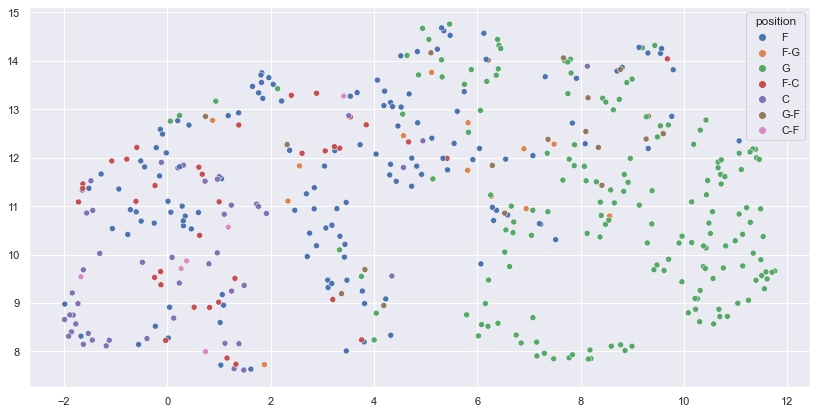

In [11]:
reducer = umap.UMAP(n_neighbors=10, min_dist=0.3, random_state=42)
X_UMAP_reduced = reducer.fit_transform(X)
sns.scatterplot(x=X_UMAP_reduced[:, 0], y=X_UMAP_reduced[:, 1], hue=y)

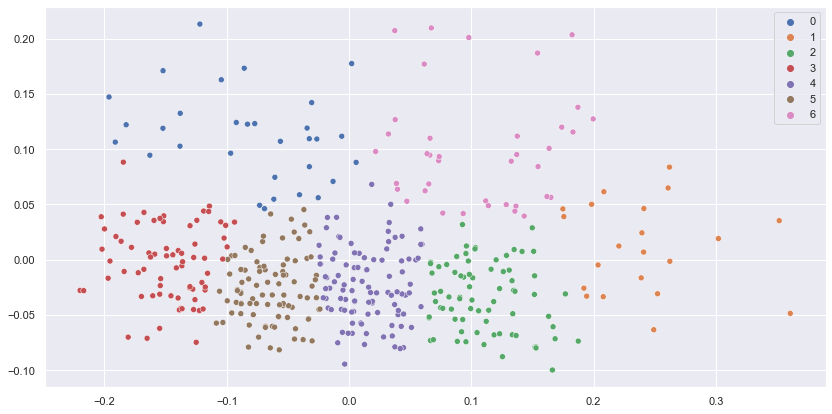

Mean distance between cluster centers: 0.083
Mean distance to center: 0.043


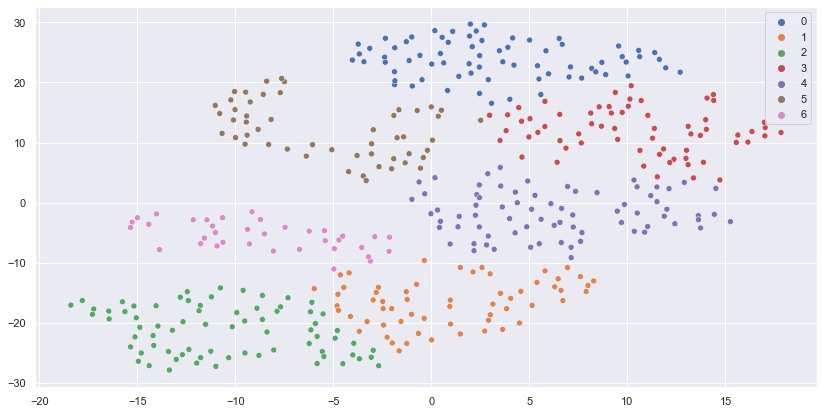

Mean distance between cluster centers: 10.151
Mean distance to center: 5.169


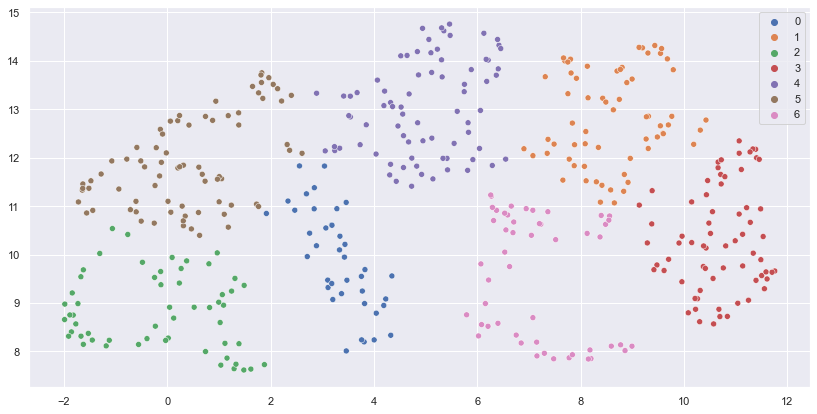

Mean distance between cluster centers: 2.463
Mean distance to center: 1.269


In [12]:
for X_reduced in [X_PCA_reduced, X_TSNE_reduced, X_UMAP_reduced]:
    kmeans = KMeans(n_clusters=7).fit(X_reduced)
    sns.scatterplot(x=X_reduced[:, 0],
                    y=X_reduced[:, 1],
                    hue=kmeans.labels_,
                    palette=sns.color_palette(n_colors=7))
    plt.show()
    mean_center_distance = np.triu(
        euclidean_distances(kmeans.cluster_centers_), 1).mean()
    print(f"Mean distance between cluster centers: {mean_center_distance:.3f}")
    mean_distance_to_center = np.mean([
        euclidean_distances([kmeans.cluster_centers_[kmeans.labels_[idx]]],
                            [point]) for idx, point in enumerate(X_reduced)
    ])
    print(f"Mean distance to center: {mean_distance_to_center:.3f}")